# HW 8

ISE 530 Optimization for Analytics Homework VIII: Nonlinearly constrained optimization. Due 11:59 PM Wednesday November 11, 2020.

- This is derived from Exercise 11.19 in Cottle-Thapa. Define the functions $s(t)$ and $c(t)$ of the real variable $t$:

\begin{align}
    s(t) = 
    \begin{cases}
        t^4 \sin\frac{1}{t} &\text{ if } t \not= 0 \\
        0 &\text{ if } t = 0 \\
    \end{cases}
    \,\,\,\,
    &
    \,\,\,\,
    c(t) = 
    \begin{cases}
        t^4 \cos\frac{1}{t} &\text{ if } t \not= 0 \\
        0 &\text{ if } t = 0 \\
    \end{cases}
\end{align}

Consider the nonlinear program:

\begin{align}
    \underset{x}{\text{minimize }} &x_2 \\
    \text{subject to } 
    &c_1(x_1, x_2) = s(x_1) − x_2 + x^2_1 \geq 0 \\
    &c_2(x_1, x_2) = x_2 − x^2_1 − c(x_1) \geq 0 \\
    \text{and } &c_3(x_1, x_2) = 1 − x^2_1 \geq 0. \\
\end{align}

Write down the KKT conditions for the problem and show that they reduce to

\begin{align}
    u_1 \geq 0, u2 \geq 0,
    \,\,\,\,
    &\text{ and } 
    \,\,\,\,
    1 + u_1 − u_2 = 0.
\end{align}

From a solution of the latter simplified conditions, construct a solution of the given problem?

- This is derived from Exercise 11.20 in Cottle-Thapa. Write down the Karush-Kuhn-Tucker conditions of the nonlinear program:

\begin{align}
    \underset{x}{\text{minimize }} &40 x_1 x_2 + 20 x_2 x_3 \\
    \text{subject to } 
    & -\frac{1}{x_1\sqrt{x_2}} - \frac{3}{x_2x^{2/3}_3} + 5 \geq 0 \\
    \text{and } &x_i \geq 1, i=1,2,3. \\
\end{align}

Find a solution along with Lagrange multipliers satisfying these conditions.

- Do parts (a), (b), and (c) in Exercise 11.21 in Cottle-Thapa.

- Consider the nonlinear program:

\begin{align}
    \underset{x}{\text{minimize }} &-x_1 - x_2 - x_1x_2 + \frac{1}{2}x^2_1 + x^2_2 \\
    \text{subject to } 
    & x_1 + x^2_2 \leq 3 \\
    & x^2_1 - x_2 = 3 \\
    \text{and } &x_1, x_2 \geq 0. \\
\end{align}

- Write down the Karush-Kuhn-Tucker (KKT) conditions of this problem.

- Show that the linear independence constraint qualification holds at the point $(2, 1)$. Does this point satisfy the KKT conditions?

- Consider a simple set in the plane consisting of points $(a, b) \geq 0$ satisfying $ab = 0$. Show that the linear independence constraint qualification cannot hold at any feasible point in the set.

- Apply the Karush-Kuhn-Tucker conditions to locate the unique of the following convex program:

\begin{align}
    \underset{x}{\text{minimize }} &x^2_1 + x^2_2 - 4x_1 - 4x_2 \\
    \text{subject to } 
    & x^2_1 - x_2 \leq 0 \text{ and } x_1 + x_2 \leq 2. \\
\end{align}

Verify your solution geometrically by showing that the problem is equivalent to a closest-point problem, i.e., finding a point in the feasible region that is closest to a given point outside of the region.

- Consider the following nonlinear program:

\begin{align}
    \underset{x}{\text{minimize }} &e^{x^2_1 - x_2} \\
    \text{subject to } 
    & e^{x_1} - e^{x_2} \leq 20 \text{ and } x_1 \geq 0. \\
\end{align}

Is the objective function convex? Argue that the constraints satisfy the Slater constraint qualification. Further argue that at an optimal solution of the problem, we must have $e^{x_1} - e^{x_2} = 20$. Use the latter fact to show that the problem is equivalent to a problem in the $x_1$-variable only. Solve the problem. Verify that the solution you obtain satisfies the Karush-Kuhn-Tucker conditions of the original problem in the $(x_1, x_2)$-variables.

In [3]:
%load_ext autotime
%load_ext nb_black
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (16, 12)

import operator
import pandas as pd
import numpy as np
import cvxpy as cp
import scipy as sp
from sympy import Matrix
from scipy import optimize

<IPython.core.display.Javascript object>

---
- This is derived from Exercise 11.19 in Cottle-Thapa. Define the functions $s(t)$ and $c(t)$ of the real variable $t$:

\begin{align}
    s(t) = 
    \begin{cases}
        t^4 \sin\frac{1}{t} &\text{ if } t \not= 0 \\
        0 &\text{ if } t = 0 \\
    \end{cases}
    \,\,\,\,
    &
    \,\,\,\,
    c(t) = 
    \begin{cases}
        t^4 \cos\frac{1}{t} &\text{ if } t \not= 0 \\
        0 &\text{ if } t = 0 \\
    \end{cases}
\end{align}

Consider the nonlinear program:

\begin{align}
    \underset{x}{\text{minimize }} &x_2 \\
    \text{subject to } 
    &c_1(x_1, x_2) = s(x_1) − x_2 + x^2_1 \geq 0 \\
    &c_2(x_1, x_2) = x_2 − x^2_1 − c(x_1) \geq 0 \\
    \text{and } &c_3(x_1, x_2) = 1 − x^2_1 \geq 0. \\
\end{align}

Write down the KKT conditions for the problem and show that they reduce to

\begin{align}
    u_1 \geq 0, u_2 \geq 0,
    \,\,\,\,
    &\text{ and } 
    \,\,\,\,
    1 + u_1 − u_2 = 0.
\end{align}

From a solution of the latter simplified conditions, construct a solution of the given problem?

\begin{align}
    s^\prime(t) = 
    \begin{cases}
        4t^3 \sin\frac{1}{t} - t^2 \cos\frac{1}{t} &\text{ if } t \not= 0 \\
        0 &\text{ if } t = 0 \\
    \end{cases}
    \,\,\,\,
    &
    \,\,\,\,
    c^\prime(t) = 
    \begin{cases}
        4t^3 \cos\frac{1}{t} + t^2 \sin\frac{1}{t} &\text{ if } t \not= 0 \\
        0 &\text{ if } t = 0 \\
    \end{cases}
\end{align}

KKT Conditions @ optimal $(x^*_1, x^*_2, \mu^*_1, \mu^*_2, \mu^*_3)$:

1. Primal Feasibility

\begin{align}
    s(x^*_1) − x^*_2 + {(x^*_1)}^2 &\geq 0 \\
    x^*_2 − {x^*_1}^2 − c(x^*_1) &\geq 0 \\
    1 − {x^*_1}^2 &\geq 0 \\
\end{align}

2. Dual Feasibility

\begin{align}
    \mu^*_1 &\geq 0 \\
    \mu^*_2 &\geq 0 \\
    \mu^*_3 &\geq 0 \\
\end{align}

3. Complementary Slackness

\begin{align}
    \mu^*_1(s(x^*_1) − x^*_2 + {(x^*_1)}^2) &= 0 \\
    \mu^*_2(x^*_2 − {x^*_1}^2 − c(x^*_1)) &= 0 \\
    \mu^*_3(1 − {x^*_1}^2) &= 0 \\
\end{align}

4. Stationarity

\begin{align}
    \nabla_x \mathcal{L}(x^*_1, x^*_2, \mu^*_1, \mu^*_2, \mu^*_3) &= 0 \\
    \nabla_x \Big[x_2 - \mu^*_1(s(x^*_1) − x^*_2 + {(x^*_1)}^2) - \mu^*_2(x^*_2 − {x^*_1}^2 − c(x^*_1)) - \mu^*_3(1 − {x^*_1}^2) \Big] &= 0 \\
    \begin{bmatrix}
        - \mu^*_1s^\prime(x^*_1) -2x^*_1 + 2\mu^*_2x^*_1 + \mu^*_2c^\prime(x^*_1) + 2\mu^*_3x^*_1 \\
        1 + \mu^*_1 - \mu^*_2 \\
    \end{bmatrix}
    &= 0 \\
\end{align}

At Optimal solution $x^*_1 = 0, x^*_2 = 0$, our KKT conditions reduce to :

\begin{align}
    u_1 \geq 0, u_2 \geq 0,
    \,\,\,\,
    &\text{ and } 
    \,\,\,\,
    1 + u_1 − u_2 = 0.
\end{align}

where $u_1 = \mu^*_1, u_2 = \mu^*_2$ $\blacksquare$

---
- This is derived from Exercise 11.20 in Cottle-Thapa. Write down the Karush-Kuhn-Tucker conditions of the nonlinear program:

\begin{align}
    \underset{x}{\text{minimize }} &40 x_1 x_2 + 20 x_2 x_3 \\
    \text{subject to } 
    & -\frac{1}{x_1\sqrt{x_2}} - \frac{3}{x_2x^{2/3}_3} + 5 \geq 0 \\
    \text{and } &x_i \geq 1, i=1,2,3. \\
\end{align}

Find a solution along with Lagrange multipliers satisfying these conditions.

KKT Conditions @ optimal $(x^*_1, x^*_2, x^*_3, \mu^*_1, \mu^*_2, \mu^*_3, \mu^*_4)$:

1. Primal Feasibility

\begin{align}
    -\frac{1}{x^*_1\sqrt{x^*_2}} - \frac{3}{x^*_2{x^*_3}^{2/3}} + 5 &\geq 0 \\
    x^*_1 - 1 &\geq 0 \\
    x^*_2 - 1 &\geq 0 \\
    x^*_3 - 1 &\geq 0 \\
\end{align}

2. Dual Feasibility

\begin{align}
    \mu^*_1 &\geq 0 \\
    \mu^*_2 &\geq 0 \\
    \mu^*_3 &\geq 0 \\
    \mu^*_4 &\geq 0 \\
\end{align}

3. Complementary Slackness

\begin{align}
    \mu^*_1(-{x^*_1}^{-1} {x^*_2}^{-0.5} -3{x^*_2}^{-1}{x^*_3}^{-2/3} + 5) &= 0 \\
    \mu^*_2(x^*_1 - 1) &= 0 \\
    \mu^*_3(x^*_2 - 1) &= 0 \\
    \mu^*_4(x^*_3 - 1) &= 0 \\
\end{align}

4. Stationarity

\begin{align}
    \nabla_{x} \mathcal{L}(x^*_1, x^*_2, x^*_3, \mu^*_1, \mu^*_2, \mu^*_3, \mu^*_4)
    &= 0 \\
    \nabla_{x} 40 x^*_1 x^*_2 + 20 x^*_2 x^*_3
    - \mu^*_1(-{x^*_1}^{-1} {x^*_2}^{-0.5} -3{x^*_2}^{-1}{x^*_3}^{-2/3} + 5)
    - \mu^*_2(x^*_1 - 1)
    - \mu^*_3(x^*_2 - 1)
    - \mu^*_4(x^*_3 - 1)
    &= 0 \\
    \begin{bmatrix}
        40x^*_2 - \mu^*_1x^{-2}_1x^{-0.5}_2 - \mu^*_2 \\
        40x^*_1 + 20x^*_3 -0.5\mu^*_1{x^*_1}^{-1}{x^*_2}^{-1.5} -3x^{-2}_2{x^*_3}^{-2/3} - \mu^*_3 \\
        20x^*_2 -2\mu^*_1 {x^*_2}^{-1} {x^*_3}^{-5/3} - \mu^*_4 \\
    \end{bmatrix}
    &= 0 \\
    \vdots \\
    \mu^*_2 &= 40x^*_2 - \mu^*_1{x^*_1}^{-2}{x^*_2}^{-0.5} \\
    \mu^*_3 &= 40x^*_1 + 20x^*_3 -0.5\mu^*_1{x^*_1}^{-1}{x^*_2}^{-1.5} -3{x^*_2}^{-2}{x^*_3}^{-2/3} \\
    \mu^*_4 &= 20x^*_2 -2\mu^*_1 {x^*_2}^{-1} {x^*_3}^{-5/3} \\
\end{align}

Substituting Stationarity conditions into complementary slackness:

\begin{align}
    \mu^*_1(-{x^*_1}^{-1} {x^*_2}^{-0.5} -3{x^*_2}^{-1}{x^*_3}^{-2/3} + 5) &= 0 \\
    (40x^*_2 - \mu^*_1{x^*_1}^{-2}{x^*_2}^{-0.5})(x^*_1 - 1) &= 0 \\
    (40x^*_1 + 20x^*_3 -0.5\mu^*_1{x^*_1}^{-1}{x^*_2}^{-1.5} -3{x^*_2}^{-2}{x^*_3}^{-2/3})(x^*_2 - 1) &= 0 \\
    (20x^*_2 -2\mu^*_1 {x^*_2}^{-1} {x^*_3}^{-5/3})(x^*_3 - 1) &= 0 \\
\end{align}

Case I: $\mu^*_1 = 0$
 
\begin{align}
    40x^*_2(x^*_1 - 1) &= 0 \\
    (40x^*_1 + 20x^*_3 - 3{x^*_2}^{-2}{x^*_3}^{-2/3})(x^*_2 - 1) &= 0 \\
    20x^*_2(x^*_3 - 1) &= 0 \\
\end{align}

A Solution: $x^*_1 = 1, x^*_2 = 1,  x^*_3 = 1, \mu^*_1 = 0, \mu^*_2 = 40, \mu^*_3 = 57, \mu^*_4 = 20$.

---
- Do parts (a), (b), and (c) in Exercise 11.21 in Cottle-Thapa.

Consider the optimization problem

\begin{align}
    \text{maximize } &x_1 \\
    \text{subject to } 
    & (x_1 - 1)^3 + x_2 \leq 0 \\
    & x_1 \leq 0 \\
    & x_2 \leq 0. \\
\end{align}

(a) Find an optimal solution for this problem. Is it unique?

Convert to minimization problem

\begin{align}
    \text{minimize } &-x_1 \\
    \text{subject to } 
    & (x_1 - 1)^3 + x_2 \leq 0 \\
    & x_1 \leq 0 \\
    & x_2 \leq 0. \\
\end{align}

KKT Conditions @ optimal $(x^*_1, x^*_2, \mu^*_1, \mu^*_2, \mu^*_3)$:

1. Primal Feasibility

\begin{align}
    (x^*_1 - 1)^3 + x^*_2 &\leq 0 \\
    x^*_1 &\leq 0 \\
    x^*_2 &\leq 0 \\
\end{align}

2. Dual Feasibility

\begin{align}
    \mu^*_1 &\geq 0 \\
    \mu^*_2 &\geq 0 \\
    \mu^*_3 &\geq 0 \\
\end{align}

3. Complementary Slackness

\begin{align}
    \mu^*_1((x^*_1 - 1)^3 + x^*_2) &= 0 \\
    \mu^*_2(x^*_1) &= 0 \\
    \mu^*_3(x^*_2) &= 0 \\
\end{align}

4. Stationarity

\begin{align}
    \nabla_x \mathcal{L}(x^*_1, x^*_2, \mu^*_1, \mu^*_2, \mu^*_3) &= 0 \\
    \nabla_x \Big[ -x^*_1 + \mu^*_1((x^*_1 - 1)^3 + x^*_2) + \mu^*_2(x^*_1) + \mu^*_3(x^*_2) \Big] &= 0 \\
    \begin{bmatrix}
        -1 + 3\mu^*_1(x^*_1 - 1)^2 + \mu^*_2 \\
        \mu^*_1 + \mu^*_3 \\
    \end{bmatrix}
    &= 0 \\
\end{align}

Substituting $\mu^*_2 = 1 - 3\mu^*_1(x^*_1 - 1)^2$ and $\mu^*_3 = \mu^*_1$ into the complementary slackness conditions:

\begin{align}
    \mu^*_1((x^*_1 - 1)^3 + x^*_2) &= 0 \\
    (1 - 3\mu^*_1(x^*_1 - 1)^2)(x^*_1) &= 0 \\
    \mu^*_1(x^*_2) &= 0 \\
    \vdots \\
    \mu^*_1(x^*_1 - 1)^3 &= 0 \\
    (1 - 3\mu^*_1(x^*_1 - 1)^2)(x^*_1) &= 0 \\
\end{align}

Case I: $x^*_1 = 1$

\begin{align}
    (1 - 3\mu^*_1(1 - 1)^2)(1) &= 0 \\
    1 &= 0 \\
\end{align}

Hence, this case is not possible and $x^*_1 \not= 1$

Case II: $\mu^*_1 = 0$

\begin{align}
    (1 - 3(0)(x^*_1 - 1)^2)(x^*_1) &= 0 \\
    \therefore x^*_1 &= 0 \\
    x^*_2 &= 0 \because \mu^*_1((x^*_1 - 1)^3 + x^*_2) = 0 \\
    \mu^*_2 &= 1 \because -1 + 3\mu^*_1(x^*_1 - 1)^2 + \mu^*_2 = 0 \\
    \mu^*_3 &= 0 \because \mu^*_3 = \mu^*_1 \\
\end{align}

Optimal solution: $x^*_1=0, x^*_2=0, \mu^*_1=0, \mu^*_2=1, \mu^*_3=0$, unique.

(b) What is the feasible region of this problem?

$\Big\{x=\begin{bmatrix}x_1 \\x_2 \end{bmatrix}: \begin{bmatrix}x_1 \\x_2\end{bmatrix} \leq 0 \Big\}$

(c) Is the Slater condition satisfied in this case?

Concavity of Constraints for Maximization problem:

\begin{align}
    (x_1 - 1)^3 + x_2 &\leq 0 \text{ is concave }\because \begin{bmatrix} 6(x_1 - 1) & 0 \\ 0 & 0 \end{bmatrix} \preccurlyeq 0 \text{ when } x_1 \leq 0 \\
    x_1 &\leq 0 \text{ is affine }\\
    x_2 &\leq 0 \text{ is affine }\\
\end{align}

Slater's condition holds as when $x$ is any vector $< 0$.

---
- Consider the nonlinear program:

\begin{align}
    \underset{x}{\text{minimize }} &-x_1 - x_2 - x_1x_2 + \frac{1}{2}x^2_1 + x^2_2 \\
    \text{subject to } 
    & x_1 + x^2_2 \leq 3 \\
    & x^2_1 - x_2 = 3 \\
    \text{and } &x_1, x_2 \geq 0. \\
\end{align}

- Write down the Karush-Kuhn-Tucker (KKT) conditions of this problem.

KKT Conditions @ optimal $(x^*_1, x^*_2, \mu^*_1, \mu^*_2, \mu^*_3)$:

1. Primal Feasibility

\begin{align}
    x^*_1 + {x^*_2}^2 - 3 &\leq 0 \\
    {x^*_1}^2 - x^*_2 - 3 &= 0 \\
    -x^*_1 &\leq 0 \\
    -x^*_2 &\leq 0 \\
\end{align}

2. Dual Feasibility

\begin{align}
    \mu^*_1 &\geq 0 \\
    \lambda^*_1 &\geq 0 \\
    \mu^*_2 &\geq 0 \\
    \mu^*_3 &\geq 0 \\
\end{align}

3. Complementary Slackness

\begin{align}
    \mu^*_1 (x^*_1 + {x^*_2}^2 - 3) &= 0 \\
    \mu^*_2 (-x^*_1) &= 0 \\
    \mu^*_3 (-x^*_2) &= 0 \\
\end{align}

4. Stationarity

\begin{align}
    \nabla_x \mathcal{L}(x^*_1, x^*_2, \mu^*_1, \lambda^*_1, \mu^*_2, \mu^*_3) &= 0 \\
    \nabla_x \Big[ -x^*_1 - x^*_2 - x^*_1x^*_2 + \frac{1}{2}{x^*_1}^2 + {x^*_2}^2 + \mu^*_1 (x^*_1 + {x^*_2}^2 - 3) + \lambda^*_1 ({x^*_1}^2 - x^*_2 - 3) + \mu^*_2 (-x^*_1) + \mu^*_3 (-x^*_2) \Big] &= 0 \\
    \begin{bmatrix}
        -1 -x^*_2 + x^*_1 + \mu^*_1 + 2\lambda^*_1 x^*_1 - \mu^*_2 \\
        -1 -x^*_1 + 2x^*_2 + 2\mu^*_1x^*_2 - \lambda^*_1 - \mu^*_3 \\
    \end{bmatrix}
    &= 0 \\
\end{align}

Substituting $\mu^*_2 = -1 -x^*_2 + x^*_1 + \mu^*_1 + 2\lambda^*_1 x^*_1$ and $\mu^*_3 = -1 -x^*_1 + 2x^*_2 + 2\mu^*_1x^*_2 - \lambda^*_1$ into the complementary slackness conditions:

\begin{align}
    \mu^*_1 (x^*_1 + {x^*_2}^2 - 3) &= 0 \\
    (-1 -x^*_2 + x^*_1 + \mu^*_1 + 2\lambda^*_1 x^*_1) (-x^*_1) &= 0 \\
    (-1 -x^*_1 + 2x^*_2 + 2\mu^*_1x^*_2 - \lambda^*_1) (-x^*_2) &= 0 \\
    \vdots \\
    \mu^*_1 (x^*_1 + {x^*_2}^2 - 3) &= 0 \\
    x^*_1 + x^*_1x^*_2 - {x^*_1}^2 - \mu^*_1x^*_1 - 2\lambda^*_1 {x^*_1}^2 &= 0 \\
    x^*_2 + x^*_1x^*_2 - 2{x^*_2}^2 - 2\mu^*_1{x^*_2}^2 + \lambda^*_1x^*_2 &= 0 \\
\end{align}

- Show that the linear independence constraint qualification holds at the point $(2, 1)$. Does this point satisfy the KKT conditions?

Gradients of Constraints:

\begin{align}
    \nabla_x c_1(x_1, x_2) &= \nabla_x (x_1 + {x_2}^2 - 3) = \begin{bmatrix} 1 \\ 2x_2 \end{bmatrix} \\
    \nabla_x c_2(x_1, x_2) &= \nabla_x ({x_1}^2 - x_2 - 3) = \begin{bmatrix} 2x_1 \\ -1 \end{bmatrix} \\
    \nabla_x c_3(x_1, x_2) &= \nabla_x (-x_1) = \begin{bmatrix} -1 \\ 0 \end{bmatrix} \\
    \nabla_x c_4(x_1, x_2) &= \nabla_x (-x_2) = \begin{bmatrix} 0 \\ -1 \end{bmatrix} \\
\end{align}

At $x_1 = 2$ and $x_2 = 1$, the following are the gradients of the active constraints:

\begin{align}
    \nabla_x c_1(x_1, x_2) &= \begin{bmatrix} 1 \\ 2 \end{bmatrix} \\
    \nabla_x c_2(x_1, x_2) &= \begin{bmatrix} 4 \\ -1 \end{bmatrix} \\
\end{align}

We see that the active constraints are linearly indepdendent, hence, Linear Independence Constraint Qualifications (LICQ) holds. $\blacksquare$

Plugging in $x_1 = 2$ and $x_2 = 1$ into the KKT Stationarity conditions:

\begin{align}
    \begin{bmatrix}
        \mu^*_2 \\
        \mu^*_3 \\
    \end{bmatrix}
    &= 
    \begin{bmatrix}
        \mu^*_1 + 4\lambda^*_1 \\ 
        -1 + 2\mu^*_1 - \lambda^*_1 \\
    \end{bmatrix} \\
\end{align}

Substituting into the Complementary slackness conditions:

\begin{align}
    (\mu^*_1 + 4\lambda^*_1) (-2) &= 0 \\
    (-1 + 2\mu^*_1 - \lambda^*_1) (-1) &= 0 \\
    &\vdots \\
    -2\mu^*_1 - 8\lambda^*_1 &= 0 \\
    1 - 2\mu^*_1 + \lambda^*_1 &= 0 \\
    &\vdots \\
    \mu^*_1 &= -4\lambda^*_1 \\
    \mu^*_1 &= 0.5 + 0.5\lambda^*_1 \\
    &\vdots \\
    -4.5\lambda^*_1 &= 0.5 \\
    \lambda^*_1 &= -\frac{1}{9} \\
\end{align}

This indicates that the point is not dual feasible, and hence does not satisfy the KKT conditions and is hence not optimal.

- Consider a simple set in the plane consisting of points $(a, b) \geq 0$ satisfying $ab = 0$. Show that the linear independence constraint qualification cannot hold at any feasible point in the set.

If $(a, b) \geq 0$ and $ab = 0$, it must mean that either $a=0$ or $b=0$ (cannot be both as it will be infeasible). 

Gradients of Constraints:

\begin{align}
    \nabla_x c_1(x_1, x_2) &= \nabla_x (x_1 + {x_2}^2 - 3) = \begin{bmatrix} 1 \\ 2x_2 \end{bmatrix} = \begin{bmatrix} 1 \\ 2b \end{bmatrix} \\
    \nabla_x c_2(x_1, x_2) &= \nabla_x ({x_1}^2 - x_2 - 3) = \begin{bmatrix} 2x_1 \\ -1 \end{bmatrix} = \begin{bmatrix} 2a \\ -1 \end{bmatrix} \\
    \nabla_x c_3(x_1, x_2) &= \nabla_x (-x_1) = \begin{bmatrix} -1 \\ 0 \end{bmatrix} \\
    \nabla_x c_4(x_1, x_2) &= \nabla_x (-x_2) = \begin{bmatrix} 0 \\ -1 \end{bmatrix} \\
\end{align}

For $(a, b)$ to be feasible, we need:

\begin{align}
    a + b^2 - 3 &\leq 0 \\
    a^2 - b - 3 &= 0 \\
    -a &\leq 0 \\
    -b &\leq 0 \\
\end{align}

If only $a = 0 \rightarrow b = -3$, violates our assumption that $(a, b) \geq 0$.

If only $b = 0 \rightarrow a = \sqrt{3}$. However, this will mean the gradient of the active constraints will be:

\begin{align}
    \begin{bmatrix} 2\sqrt{3} \\ -1 \\ \end{bmatrix} \\
    \begin{bmatrix} 0 \\ -1 \\ \end{bmatrix} \\
\end{align}

which are linearly independent.

Unless $a = \sqrt{3}, b=0$, LICQ cannot hold, given that $(a, b) \geq 0$ satisfying $ab = 0$. $\blacksquare$

---
- Apply the Karush-Kuhn-Tucker conditions to locate the unique of the following convex program:

\begin{align}
    \underset{x}{\text{minimize }} &x^2_1 + x^2_2 - 4x_1 - 4x_2 \\
    \text{subject to } 
    & x^2_1 - x_2 \leq 0 \text{ and } x_1 + x_2 \leq 2. \\
\end{align}

KKT Conditions @ optimal $(x^*_1, x^*_2, \mu^*_1, \mu^*_2)$:

1. Primal Feasibility

\begin{align}
    {x^*_1}^2 - x^*_2 \leq 0 \\
    x^*_1 + x^*_2 - 2 \leq 0 \\
\end{align}

2. Dual Feasibility

\begin{align}
    \mu^*_1 &\geq 0 \\
    \mu^*_2 &\geq 0 \\
\end{align}

3. Complementary Slackness

\begin{align}
    \mu^*_1 ({x^*_1}^2 - x^*_2) &= 0 \\
    \mu^*_2 (x^*_1 + x^*_2 - 2) &= 0 \\
\end{align}

4. Stationarity

\begin{align}
    \nabla_x \mathcal{L}(x^*_1, x^*_2, \mu^*_1, \mu^*_2) &= 0 \\
    \nabla_x \Big[ {x^*_1}^2 + {x^*_2}^2 - 4x^*_1 - 4x^*_2 + \mu^*_1 ({x^*_1}^2 - x^*_2) + \mu^*_2 (x^*_1 + x^*_2 - 2) \Big] &= 0 \\
    \begin{bmatrix}
        2x^*_1 - 4 + 2\mu^*_1 x^*_1 + \mu^*_2 \\
        2x^*_2 - 4 - \mu^*_1 + \mu^*_2 \\
    \end{bmatrix}
    &= 0 \\
\end{align}

Substituting $\mu^*_2 = -2x^*_2 + 4 + \mu^*_1$ into $2x^*_1 - 4 + 2\mu^*_1 x^*_1 + \mu^*_2 = 0$:

\begin{align}
    2x^*_1 - 4 + 2\mu^*_1 x^*_1 - 2x^*_2 + 4 + \mu^*_1 &= 0 \\
    \mu^*_1(2x^*_1 + 1) &= -2x^*_1 + 2x^*_2 \\
    \mu^*_1 &= \frac{-2x^*_1 + 2x^*_2}{2x^*_1 + 1} \,\,--\,\,(1) \\
\end{align}

Substituting $\mu^*_2 = -2x^*_2 + 4 + \mu^*_1$ into the second complementary slackness condition $\mu^*_2 (x^*_1 + x^*_2 - 2) = 0$:

\begin{align}
    (-2x^*_2 + 4 + \mu^*_1)(x^*_1 + x^*_2 - 2) &= 0 \\
\end{align}

Case I: $\mu^*_2 = 0 \rightarrow -2x^*_2 + 4 + \mu^*_1 = 0$, $\therefore \mu^*_1 = 2x^*_2 - 4 \,\,--\,\,(2)$

Substituting into first complementary slackness condition:

\begin{align}
    \mu^*_1 ({x^*_1}^2 - x^*_2) &= 0 \\
    (2x^*_2 - 4) ({x^*_1}^2 - x^*_2) &= 0 \\
    2x^*_2({x^*_1}^2 - x^*_2) - 4({x^*_1}^2 - x^*_2) &= 0 \\
    2x^*_2{x^*_1}^2 - 2{x^*_2}^2 - 4{x^*_1}^2 + 4x^*_2 &= 0 \\
    {x^*_1}^2 &= \frac{{x^*_2}^2 - 2x^*_2}{x^*_2 - 2} \\
    {x^*_1}^2 &= x^*_2\frac{x^*_2 - 2}{x^*_2 - 2} \\
    {x^*_1}^2 &= x^*_2 \\
\end{align}

(1) = (2):

\begin{align}
    2x^*_2 - 4 &= \frac{-2x^*_1 + 2x^*_2}{2x^*_1 + 1} \\
    2(x^*_2 - 2)(2x^*_1 + 1) &= -2x^*_1 + 2x^*_2 \\
    2({x^*_1}^2 - 2)(2x^*_1 + 1) &= -2x^*_1 + 2{x^*_1}^2 \\
    2({x^*_1}^2 - 2)(2x^*_1 + 1) &= -2x^*_1 (1 - x^*_1) \\
    4{x^*_1}^3 + 2{x^*_1}^2 - 8x^*_1 - 4 &= -2x^*_1 + 2{x^*_1}^2 \\
    4{x^*_1}^3 - 6x^*_1 - 4 &= 0 \\
    2{x^*_1}^3 - 3x^*_1 - 2 &= 0 \\
\end{align}

In [18]:
solution = sp.optimize.root(lambda x: 2 * (x[0] ** 3) - 3 * x[0] - 2, x0=[1.4])
solution

    fjac: array([[-1.]])
     fun: -1.0658141036401503e-14
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-6.60441746e-09])
       r: array([-10.06588727])
  status: 1
 success: True
       x: array([1.47568652])

time: 2.75 ms


<IPython.core.display.Javascript object>

In [20]:
x_2_star = solution.x[0] ** 2
μ_1_star = 2 * x_2_star - 4
μ_2_star = 0
print(
    f"Optimal Solution: x^*_1={np.round(solution.x[0], 3)}, x^*_2={np.round(x_2_star, 3)}, μ^*_1={np.round(μ_1_star, 3)}, μ^*_2={np.round(μ_2_star, 3)}"
)

Optimal Solution: x^*_1=1.476, x^*_2=2.178, μ^*_1=0.355, μ^*_2=0
time: 1.36 ms


<IPython.core.display.Javascript object>

However, since $x_1 + x_2 \leq 2$ is violated, this solution is rejected.

Case II: $x^*_1 = -x^*_2 + 2 \,\,--\,\,(3)$

Substituting $(3)$ into $(1)$: $\mu^*_1 = \frac{-2(-x^*_2 + 2) + 2x^*_2}{2(-x^*_2 + 2) + 1}$ and into first complementary slackness condition:

\begin{align}
    \frac{-2(-x^*_2 + 2) + 2x^*_2}{2(-x^*_2 + 2) + 1} ({(-x^*_2 + 2)}^2 - x^*_2) &= 0 \\
    \frac{2x^*_2 - 4 + 2x^*_2}{-2x^*_2 + 4 + 1} ({x^*_2}^2 - 4x^*_2 + 4 - x^*_2) &= 0 \\
    \frac{4x^*_2({x^*_2}^2 - 5x^*_2 + 4) - 4({x^*_2}^2 - 5x^*_2 + 4)}{-2x^*_2 + 5} &= 0 \\
    \frac{4x^*_2({x^*_2}^2 - 5x^*_2 + 4) - 4({x^*_2}^2 - 5x^*_2 + 4)}{-2x^*_2 + 5} &= 0 \\
    \frac{4(x^*_2 - 1)(x^*_2 - 4)(x^*_2 - 1)}{-2x^*_2 + 5} &= 0 \\
    \therefore x^*_2 &= 1 \text{ or } x^*_2 = 4 \text{ Rejected as } x^*_1 \geq 0 \\ 
\end{align}

Optimal Solution: $x^*_1 = 1, x^*_2 = 1, \mu^*_1=0, \mu^*_2 = 2 \because \mu^*_2 = -2x^*_2 + 4 + \mu^*_1$

Verify your solution geometrically by showing that the problem is equivalent to a closest-point problem, i.e., finding a point in the feasible region that is closest to a given point outside of the region.

\begin{align}
    \underset{x}{\text{minimize }} &x^2_1 + x^2_2 - 4x_1 - 4x_2 \\
    \text{subject to } 
    & x^2_1 - x_2 \leq 0 \text{ and } x_1 + x_2 \leq 2. \\
\end{align}

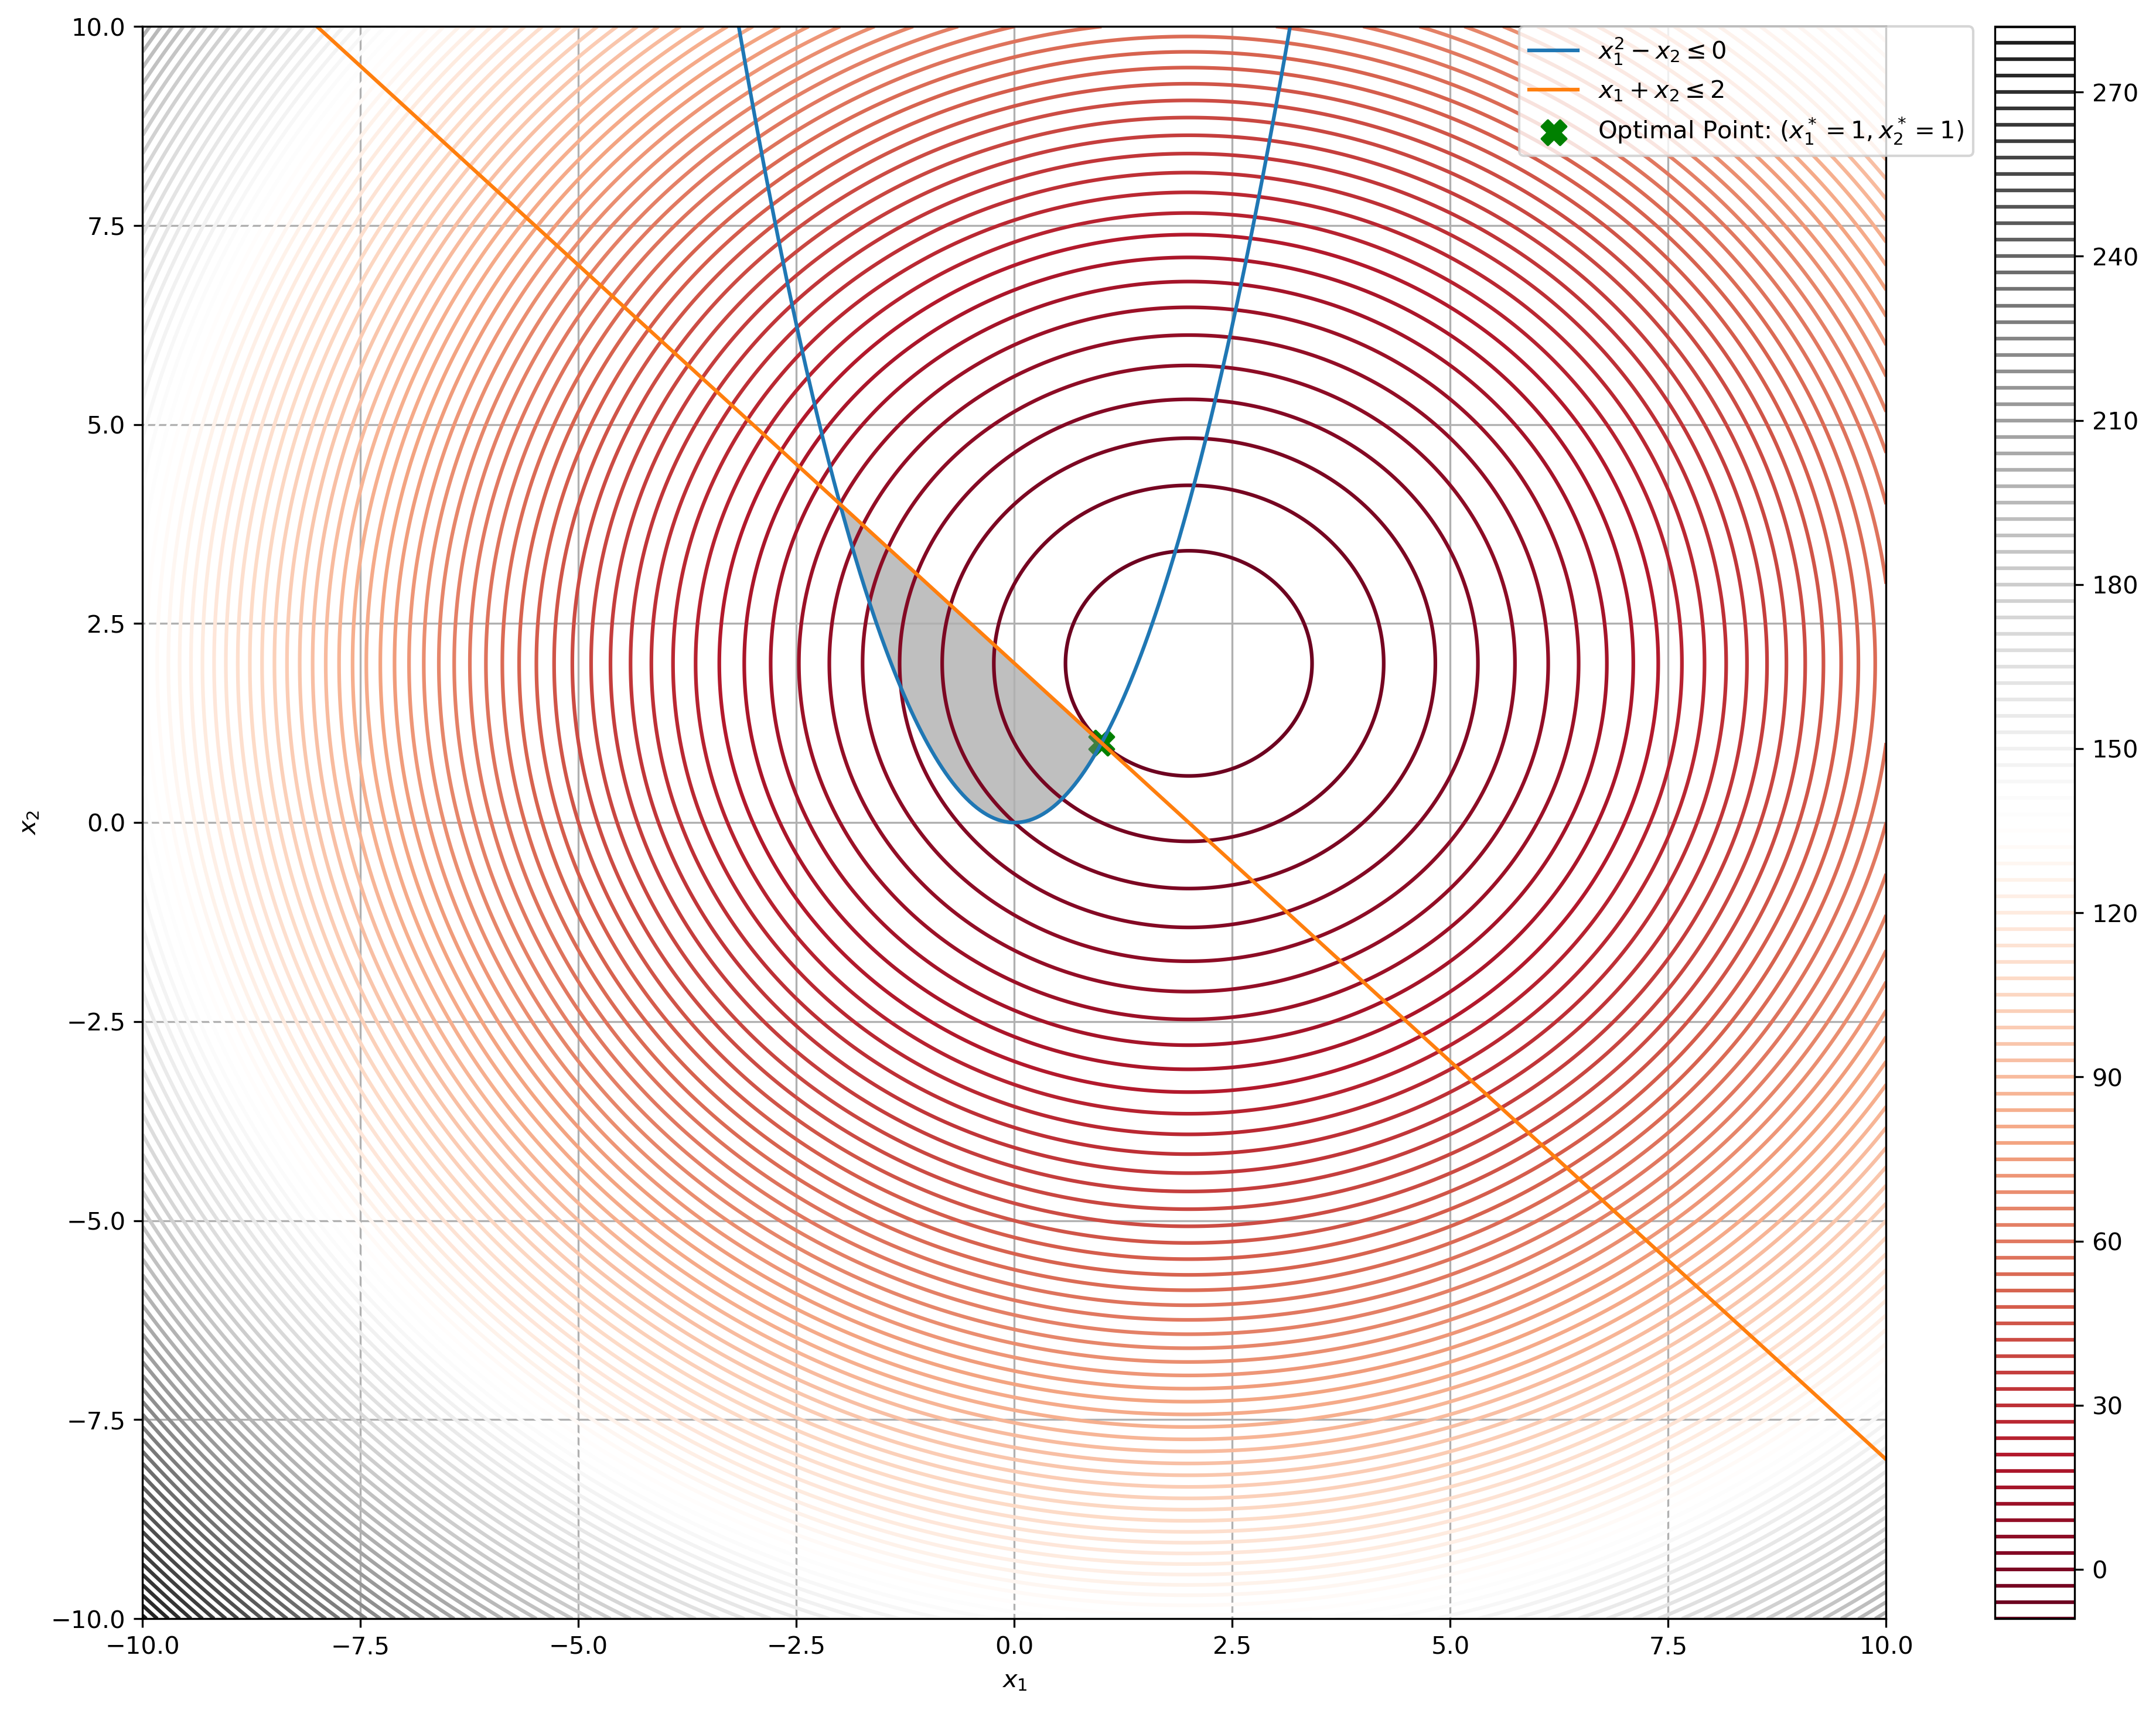

time: 2.94 s


<IPython.core.display.Javascript object>

In [38]:
f = lambda x: x[0] ** 2 + x[1] ** 2 - 4 * x[0] - 4 * x[1]
x_1 = np.linspace(-10, 10, 1000)
x_2_1 = lambda x_1: x_1 ** 2  # 𝑥^2_1 − 𝑥_2 ≤ 0
x_2_2 = lambda x_1: 2 - x_1  # 𝑥_1 + 𝑥_2 ≤ 2

# Constraints
plt.plot(x_1, x_2_1(x_1), label=r"$x^2_1 - x_2 \leq 0$")
plt.plot(x_1, x_2_2(x_1), label=r"$x_1 + x_2 \leq 2$")

# Objective function
X_1, X_2 = np.meshgrid(x_1, x_1)
Z = f([X_1, X_2])
plt.contour(X_1, X_2, Z, 100, cmap="RdGy")
plt.colorbar()

# Optimal point
plt.scatter(
    1, 1, s=100, c="green", marker="X", label=r"Optimal Point: ($x^*_1 = 1, x^*_2 = 1$)"
)

plt.xlim((-10, 10))
plt.ylim((-10, 10))
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

# Fill feasible region
x_2_lb = np.minimum(x_2_1(x_1), x_2_2(x_1))
plt.fill_between(
    x_1, x_2_lb, x_2_2(x_1), where=x_2_2(x_1) > x_2_lb, color="grey", alpha=0.5
)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc="best", borderaxespad=0.0)
plt.show()

We see that the problem is essentially finding the smallest radius of the concentric rings thatmeet both constraints at a point.

---
- Consider the following nonlinear program:

\begin{align}
    \underset{x}{\text{minimize }} &e^{x^2_1 - x_2} \\
    \text{subject to } 
    & e^{x_1} - e^{x_2} \leq 20 \text{ and } x_1 \geq 0. \\
\end{align}

Is the objective function convex? Argue that the constraints satisfy the Slater constraint qualification. Further argue that at an optimal solution of the problem, we must have $e^{x_1} - e^{x_2} = 20$. Use the latter fact to show that the problem is equivalent to a problem in the $x_1$-variable only. Solve the problem. Verify that the solution you obtain satisfies the Karush-Kuhn-Tucker conditions of the original problem in the $(x_1, x_2)$-variables.

Hessian of ${x_1}^2 - x_2$ is positive semi-definite, hence convex:

\begin{align}
    \begin{bmatrix}
        2 & 0 \\
        0 & 0 \\
    \end{bmatrix}
\end{align}

Exponential of convex function is strictly convex, meaning our objective function is strictly convex.

$e^{x_1} - e^{x_2} - 20 \leq 0$ is stricly convex since exponential of affine / convex functions are strictly convex, summation is a convex operation, meaning that the constraint is convex, the other constraint $-x_1 \leq 0$ is simply affine.

Purely by observation, we know beforehand that the infimum of $e^{-x}$ is $0$. We can clearly see that since $x_2$ is free, by setting $x_1 = 0$, and $x_2 = \infty$, we achieve the infimum of our objective function while satisfying the constraints.

By using the equality constraint $e^{x_1} - e^{x_2} = 20 \rightarrow x_2 = \ln{(e^{x_1} - 20)}$:

\begin{align}
    \underset{x}{\text{minimize }} &-e^{x^2_1}\ln{(e^{x_1} - 20)} \\
    \text{subject to } &x_1 \geq 0. \\
\end{align}

In [39]:
solution = sp.optimize.root(
    lambda x: -np.exp(x[0] ** 2) * np.log(np.exp(x[0]) - 20), x0=[5]
)
solution

    fjac: array([[-1.]])
     fun: -2.562096193561078e-09
 message: 'The solution converged.'
    nfev: 31
     qtf: array([0.00020205])
       r: array([222715.83895117])
  status: 1
 success: True
       x: array([3.04452244])

time: 4.22 ms


<IPython.core.display.Javascript object>

In [40]:
x_1_star = solution.x[0]
x_2_star = np.log(np.exp(x_1_star) - 20)
x_1_star, x_2_star

(3.0445224377234346, 2.415845301584049e-13)

time: 2.26 ms


<IPython.core.display.Javascript object>

KKT Conditions @ optimal $(x^*_1, x^*_2, \mu^*_1, \mu^*_2)$:

Primal Feasibility:
\begin{align}
    e^{x^*_1} - e^{x^*_2} - 20 &\leq 0 \\
    -x^*_1 &\leq 0
\end{align}

Dual Feasibility:
\begin{align}
    \mu^*_1 &\geq 0 \\
    \mu^*_2 &\geq 0
\end{align}

Complementary Slackness:
\begin{align}
    \mu^*_1(e^{x^*_1} - e^{x^*_2} - 20) &= 0 \\
    \mu^*_2(-x^*_1) &= 0
\end{align}

Stationarity:
\begin{align}
    \nabla_x \mathcal{L}(x^*_1, x^*_2, \mu^*_1, \mu^*_2) &= 0 \\
    \nabla_x \Big[ e^{{x^*_1}^2 - x^*_2} + \mu^*_1(e^{x^*_1} - e^{x^*_2} - 20) + \mu^*_2(-x^*_1) \Big] &= 0 \\
    \begin{bmatrix}
        2x^*_1e^{{x^*_1}^2 - x^*_2} + \mu^*_1e^{x^*_1} - \mu^*_2 \\
        -e^{{x^*_1}^2 - x^*_2} - \mu^*_1e^{x^*_2} \\
    \end{bmatrix}
    &= 0 \\
    \begin{bmatrix}
        2x^*_1e^{{x^*_1}^2 - x^*_2} + \mu^*_1e^{x^*_1} \\
        -\frac{e^{{x^*_1}^2 - x^*_2}}{e^{x^*_2}} \\
    \end{bmatrix}
    &= \begin{bmatrix} \mu^*_2 \\ \mu^*_1 \\ \end{bmatrix} \\
\end{align}

In [41]:
μ_1_star = -np.exp(x_1_star ** 2 - x_2_star) / np.exp(x_2_star)
μ_2_star = 2 * x_1_star * np.exp(x_1_star ** 2 - x_2_star) + μ_1_star * np.exp(x_1_star)
μ_1_star, μ_2_star

(-10605.381859011817, -158136.37297846202)

time: 2.54 ms


<IPython.core.display.Javascript object>